In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X=df.iloc[:,1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
Y=df.iloc[:,-1].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
dtf= DecisionTreeRegressor(random_state=0)
dtf.fit(X,Y)

DecisionTreeRegressor(random_state=0)

In [8]:
dtf.predict([[6.5]])

array([150000.])

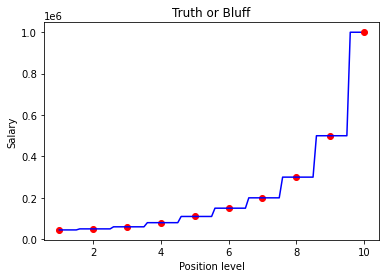

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,Y,color='red')
plt.plot(X_grid,dtf.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [14]:
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree

In [15]:
print(tree.export_text(dtf))



|--- feature_0 <= 8.50
|   |--- feature_0 <= 6.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- value: [45000.00]
|   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |--- value: [50000.00]
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- value: [60000.00]
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- value: [80000.00]
|   |   |--- feature_0 >  4.50
|   |   |   |--- feature_0 <= 5.50
|   |   |   |   |--- value: [110000.00]
|   |   |   |--- feature_0 >  5.50
|   |   |   |   |--- value: [150000.00]
|   |--- feature_0 >  6.50
|   |   |--- feature_0 <= 7.50
|   |   |   |--- value: [200000.00]
|   |   |--- feature_0 >  7.50
|   |   |   |--- value: [300000.00]
|--- feature_0 >  8.50
|   |--- feature_0 <= 9.50
|   |   |--- value: [500000.00]
|   |--- feature_0 >  9.50
|   |   |--- value: [1000000.00]



[Text(0.703125, 0.9285714285714286, '[1] <= 8.5\nsquared_error = 80662250000.0\nsamples = 10\nvalue = 249500.0'),
 Text(0.53125, 0.7857142857142857, '[1] <= 6.5\nsquared_error = 6921484375.0\nsamples = 8\nvalue = 124375.0'),
 Text(0.375, 0.6428571428571429, '[1] <= 4.5\nsquared_error = 1381250000.0\nsamples = 6\nvalue = 82500.0'),
 Text(0.25, 0.5, '[1] <= 3.5\nsquared_error = 179687500.0\nsamples = 4\nvalue = 58750.0'),
 Text(0.1875, 0.35714285714285715, '[1] <= 2.5\nsquared_error = 38888888.889\nsamples = 3\nvalue = 51666.667'),
 Text(0.125, 0.21428571428571427, '[1] <= 1.5\nsquared_error = 6250000.0\nsamples = 2\nvalue = 47500.0'),
 Text(0.0625, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(0.1875, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(0.25, 0.21428571428571427, 'squared_error = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(0.3125, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 80000.0'),
 Tex

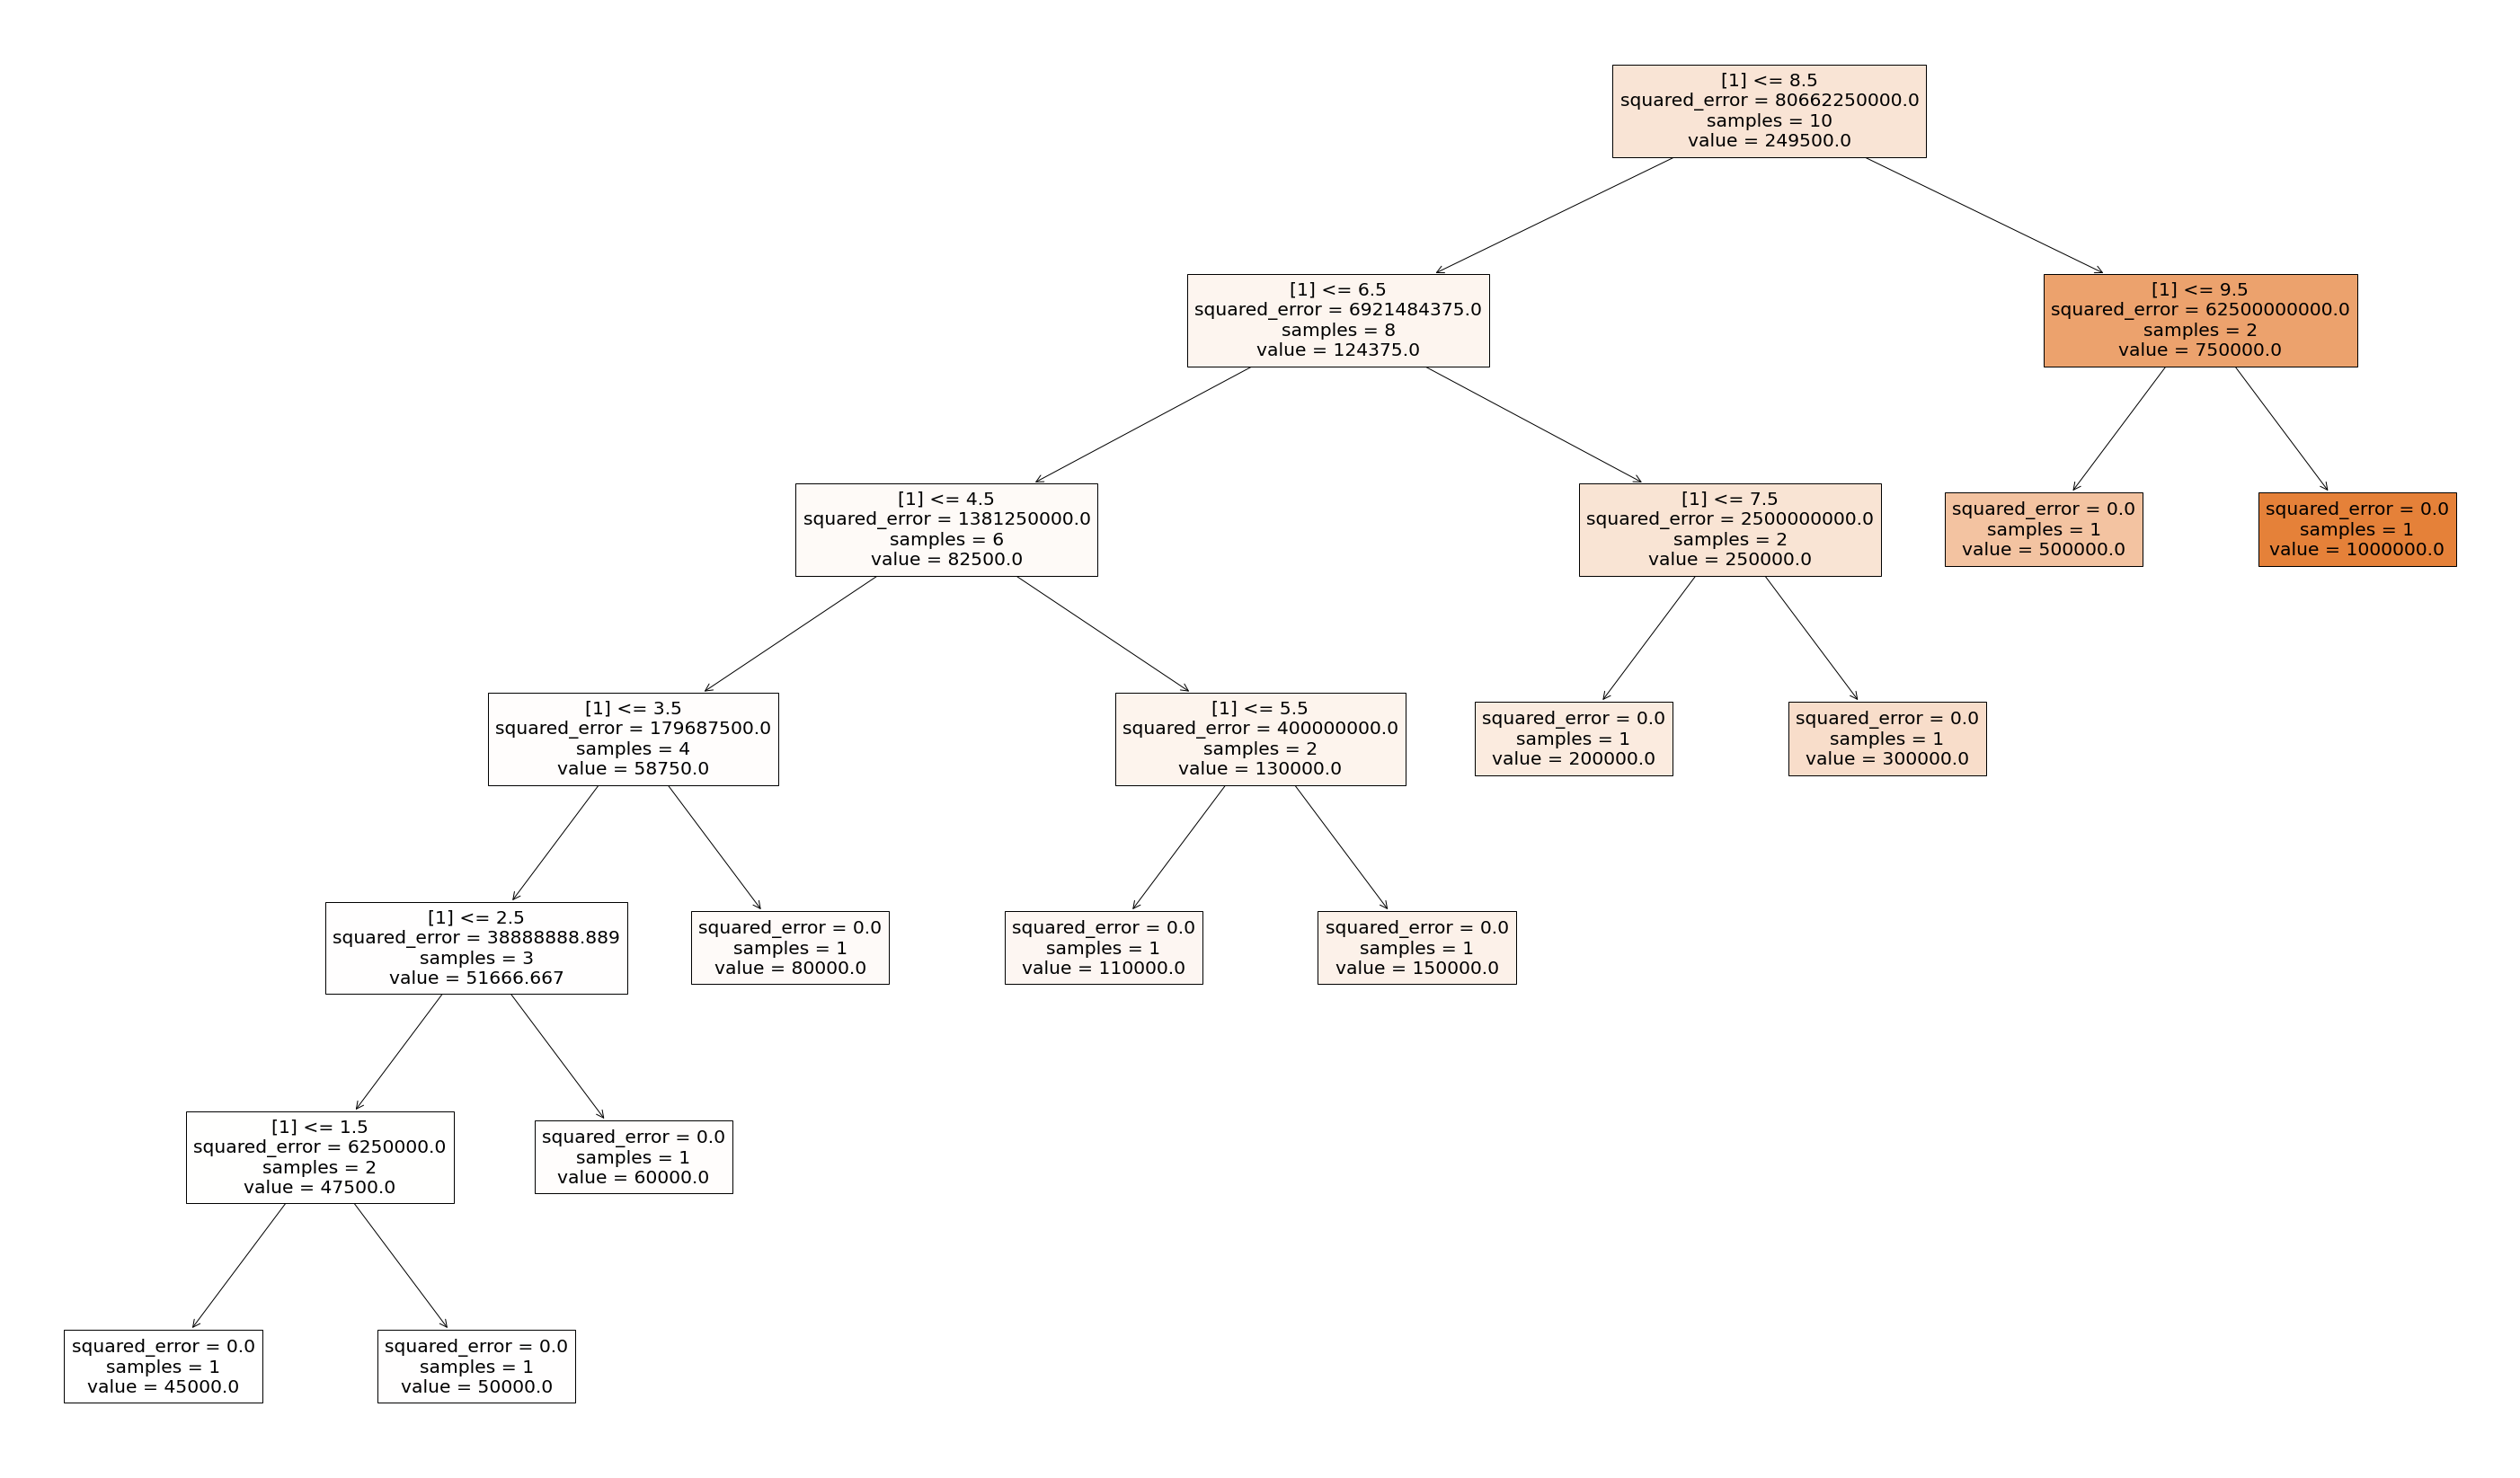

In [25]:
fig=plt.figure(figsize=(50,30))
tree.plot_tree(dtf,feature_names=X,class_names=Y,filled=True)
#shj